%%html
<style>
    .myblock {
        font-style: normal;
        text-align: justify;
        margin-left: 0px;
        margin-right: 10px;
        margin-top: 10px;
        margin-bottom: 0px;
        padding: 10px;
        display: block;
        border-radius: 20px;
    }
    
    .exercise {
        background-color: #AFEEEE;
    }
    
    .theorem {
        background-color: #FEC4A3;
    }
</style>

<center style="font-size:25px;padding-bottom:10px;"><b>Continuous stochastic processes</b></center>
<center style="font-size:22px;padding-bottom:10px;"><b>Homework 1</b></center>

<center style="font-size:20px;padding-bottom:10px;">José Antonio Álvarez Ocete</center>

<center style="font-size:20px;">Francisco Javier Sáez Maldonado</center>

In [15]:
%load_ext autoreload
%autoreload 2
import exercises as ex
import imports.stochastic_plots as plots
from scipy import stats
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<div class="myblock exercise">
<h1>Exercise 1</h1> <a href='#Ejercicio-1' class='anchor-link'>¶</a>

A Poisson process with rate $\lambda$ can be defined as a counting process $\{N(t); t \ge0 \}$ with the following properties:
    
(a) $N(0) = 0$

(b) $N(t)$  has independent and stationary increments.
    
(c) Let $\Delta N(t) = N(t + \Delta t) - N(t)$ with $\Delta t \rightarrow 0^+$. The following relations hold:
    
$$
\begin{align}
    \mathbb P[\Delta N(t) = 0] & \; = 1 - \lambda \Delta t + o(\Delta t) \qquad & (1) \\ 
    \mathbb P[\Delta N(t) = 1] & \; = \lambda \Delta t + o(\Delta t) \qquad & (2) \\
    \mathbb P[\Delta N(t) \ge 2] & \; = o(\Delta t) \qquad & (3)
\end{align}
$$
    
<b>a)</b> From this definition show that

$$
    \mathbb P[N(t) = n] = \frac{1}{n!} \lambda^n t^n e^{-\lambda t} \qquad (4) \\
$$  
     
<b>b)</b> Illustrate the validity of the derivation by comparing the empirical distribution obtained in a simulation of the Poisson process and the theorical distribution of $\mathbb P[N(t) = n]$ given by the equation (4) for the values $\lambda=10$ and $t=2$.
</div>

### Solution to a)

We will prove equation (4) by an inductive procedure.

#### Case n=0:

From statement (c) we know that $N(t + \Delta t) = \Delta N(t) + N(t)$. Then:

$$
\begin{align}
    \mathbb P[N(t + \Delta t) = 0] & = \mathbb P[\Delta N(t) + N(t) = 0] \\ 
    & \stackrel{(*)}{=} \mathbb P[\Delta N(t) = 0] \; \mathbb P[N(t) = 0] \\
    & \stackrel{(1)}{=} \mathbb P[\Delta N(t) = 0] \;  (1 - \lambda \Delta t + o(\Delta t)) \\
\end{align}
$$

where in $(*)$ we use statement (b) and the fact that $N(t), \Delta N(t) \ge 0$. Rearranging the previous terms we obtain:

$$
    \frac{ \mathbb P[N(t + \Delta t) = 0] - \mathbb P[\Delta N(t) = 0] } {\Delta t} = - \lambda \mathbb P[\Delta N(t) = 0] + \frac{o(\Delta t)}{\Delta t} \mathbb P[\Delta N(t) = 0]
$$

Taking $\lim_{\Delta t \rightarrow 0^+}$ and using the definition of derivative we obtain:

$$
    \frac{\text d} {\text dt} \mathbb P[\Delta N(t) = 0] = - \lambda \mathbb P[\Delta N(t) = 0]
$$

This is a linear homogeneus diferential equation, which only solution that satifies the initial condition $\mathbb P[\Delta N(t) = 0] = 1$ is

$$
    \mathbb P[\Delta N(t) = 0] = e^{-\lambda t}
$$

#### Case n>0:

Let's prove the $n$-case with our induction hypothesis for $n-1$:

$$
    \mathbb P[N(t) = n-1] = \frac{1}{(n-1)!} \lambda^{n-1} t^{n-1} e^{-\lambda t} \qquad (5) \\
$$  

We begin with the same development as in the base case, but for and arbitrary $n$:

$$
\begin{align}
    \mathbb P[N(t + \Delta t) = n] & = \mathbb P[\Delta N(t) + N(t) = n] \\ 
    & \stackrel{(*)}{=} \sum_{k=0}^n \mathbb P[\Delta N(t) = k] \; \mathbb P[N(t) = n-k] \\
    & = \mathbb P[\Delta N(t) = 0] \; \mathbb P[N(t) = n] \\
    & + \mathbb P[\Delta N(t) = 1] \; \mathbb P[N(t) = n-1] \\
    & + \sum_{k=2}^n \mathbb P[\Delta N(t) = k] \; \mathbb P[N(t) = n-k] \\
    & \stackrel{(1,2,3)}{=} (1 - \lambda \Delta t + o(\Delta t)) \; \mathbb P[N(t) = n] \\
    & + (\lambda \Delta t + o(\Delta t)) \; \mathbb P[N(t) = n-1] \\
    & + o(\Delta t) \sum_{k=2}^n \mathbb \; \mathbb P[N(t) = n-k] \\
    & = (1 - \lambda \Delta t ) \; \mathbb P[N(t) = n] + \lambda \Delta t \; \mathbb P[N(t) = n-1] \\
    & + o(\Delta t) \sum_{k=0}^n \mathbb \; \mathbb P[N(t) = n-k] \\
\end{align}
$$

where in $(*)$ we use statement (b) and the fact that $N(t), \Delta N(t) \ge 0$. Rearranging the previous terms we obtain:

$$
    \frac{ \mathbb P[N(t + \Delta t) = n] - \mathbb P[\Delta N(t) = n] } {\Delta t} = - \lambda \bigg( \mathbb P[\Delta N(t) = n] - \mathbb P[\Delta N(t) = n-1] \bigg) + \frac{o(\Delta t)}{\Delta t} \sum_{k=0}^n \mathbb \; \mathbb P[N(t) = n-k]
$$

Taking $\lim_{\Delta t \rightarrow 0^+}$ and using the definition of derivative we obtain:

$$
    \frac{\text d} {\text dt} \mathbb P[\Delta N(t) = n] = - \lambda \bigg( \mathbb P[\Delta N(t) = n] - \mathbb P[\Delta N(t) = n-1] \bigg)
$$

Using the induction hypothesis (6) we obtain our differential equation:

$$
    \frac{\text d} {\text dt} \mathbb P[\Delta N(t) = n] = - \lambda \bigg( \mathbb P[\Delta N(t) = n] - \frac{1}{(n-1)!} \lambda^{n-1} t^{n-1} e^{-\lambda t} \bigg)
$$

Let us rename our space variable in the previous equation understand it better. We are looking for a function $y(t)$ such that

$$
    \frac{\text d} {\text dt} y(t) = - \lambda \bigg( y(t) - \frac{1}{(n-1)!} \lambda^{n-1} t^{n-1} e^{-\lambda t} \bigg) \qquad (6) \\
$$

This differential equation is not linear and, as such, we can solve it using separated variables as we did in the base case. We may use Picard-Lindelöf's Theorem to prove that the solution is unique, and then prove that (4) is a solution to the equation (6). Thus, proving that is the only solution.

<div class="myblock theorem">
<h1>Theorem (Picard Lindelöf's)</h1>

Consider the initial value problem

$$
    \frac{\text d} {\text dt} y(t) = f(t,y(t)), \qquad y(t_{0})=y_{0}.
$$
    
Suppose $f$ is uniformly Lipschitz continuous in $y$ (meaning the Lipschitz constant can be taken independent of $t$) and continuous in $t$, then there exists a unique solution $y(t)$ to the initial value problem.
</div>

Since our function $f(t,y(t))$ is continuous in $t$, we just need to prove that is uniformly Lipschitz continuous in $y$.

$$
    \frac{\text d} {\text dy} f(t,y(t)) = - \lambda \in \mathbb R
$$

Since the derivative with respect to $y$ of $f$ is constant, $f$ is uniformly Lipschitz continuous and our initial value problem given by teh equation (6) and the initial condition $\mathbb P[\Delta N(t) = n] = 0$ is unique.

We just need to prove that (4) is a solution to the differential equation (6). Let $x(t)$ be

$$
    x(t) \equiv \frac{1}{n!} \lambda^n t^n e^{-\lambda t}.
$$  

Then,

$$
\begin{align}
    \frac{\text d} {\text dt} x(t) & = \frac{-\lambda^{n+1} t^{n}}{n!} e^{-\lambda t} + \frac{\lambda^{n} t^{n-1}}{(n-1)!} e^{-\lambda t} \\ 
    & = -\lambda \bigg(\frac{-\lambda^{n} t^{n}}{n!} e^{\lambda t} - \frac{\lambda^{n-1} t^{n-1}}{(n-1)!} e^{-\lambda t} \bigg) \\
    & = -\lambda \bigg(x(t) - \frac{\lambda^{n-1} t^{n-1}}{(n-1)!} e^{-\lambda t} \bigg)
\end{align}
$$

Proving that $x(t)$ as defined in equation (4) is a solution to the differential equation.

### Solution to b)

In order to simulate this Poisson process we will use the provided function $simulate\_poisson$. Since it returns the different times of arrival of a simulated Poisson process with the given parameters, we simply fix $t_1=2$ and count the number of events that ocurred in that legnth of time.

By repeating this process $n\_samples=10^4$ times, we obtain different values of $\mathbb P[N(2) = n]$. Finally, we use a $Counter$ to wrap the number of times $k$ events happened.

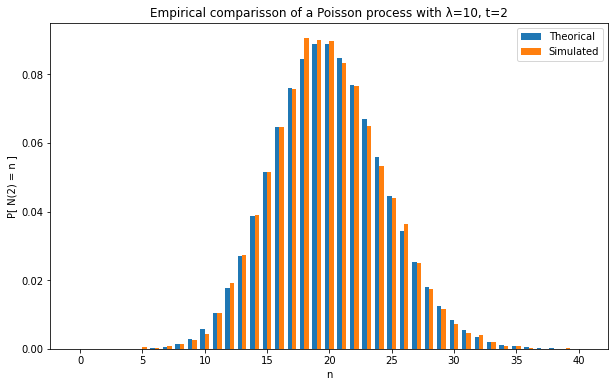

In [4]:
ex.exercise_1()

<div class="myblock exercise">
<h1>Exercise 2</h1> <a href='#Ejercicio-2' class='anchor-link'>¶</a>

Simulate a Poisson process with $\lambda = 5$. From these simulations show for different values of $n \in \{1,2,5,10\}$ that the probability density of the $n$-th arrival is

$$
    f_{S_n} (t) = \frac{1}{(n-1)!} \lambda^n t^{n-1} e^{-\lambda t}
$$
</div>

We will make use of kernel density estimations to approximate the theorical probability density function of the $n$th arrival, which actually matches the Erlang distribution. The $kde\_bandwidth$ parameter dictates the bandwidth of each kernemini-kernel used in the estimation. For lower values, a better estimation is obtained for lower $n$s, which have huge peaks in small areas. However, the smaller we make that parameter, the more we overfit, obtaining less smooth estimations.

In order to sample the $s_n$ time we re-use the provided function $simulate\_poisson$, and grab the $(n$-$th - 1)$ element. We will sample that value $n\_samples\_kde=10^4$ times for a good estimation. 

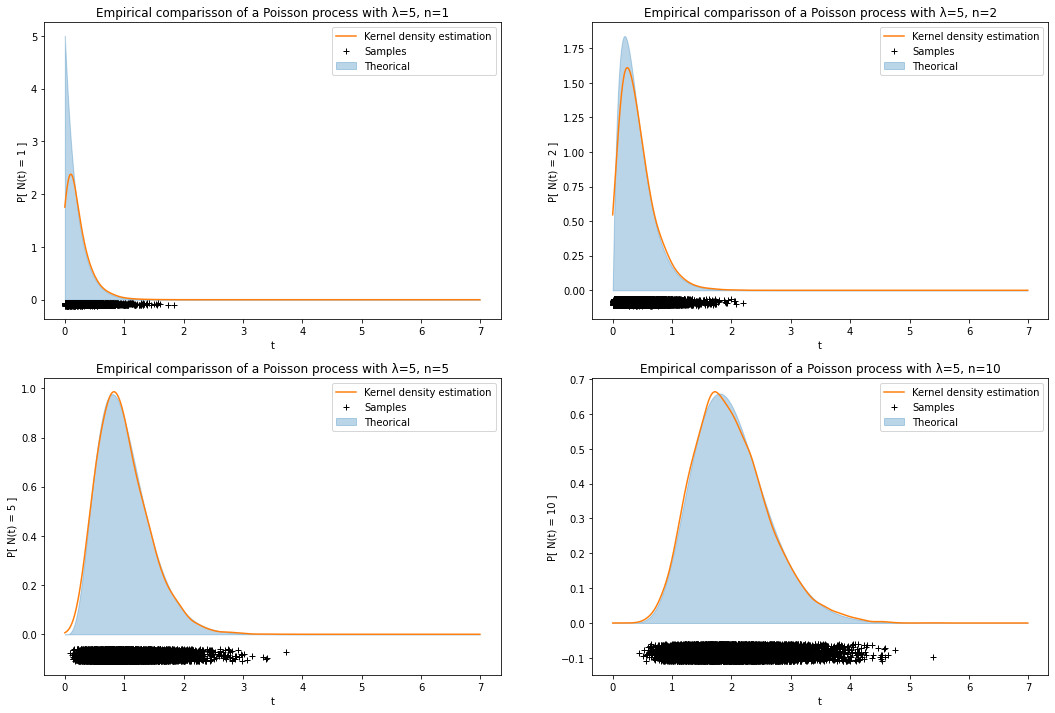

In [5]:
ex.exercise_2(kde_bandwidth=0.1)


<div class="myblock exercise">
<h1>Exercise 3</h1> <a href='#Ejercicio-3' class='anchor-link'>¶</a>
    
Asume that we have a sample $\{U_i\}_{i=1}^n$ of $n$ iid $U[0,t]$. The probability density of the order statistic $\{U_{(1)} < U_{(2)} < \dots < U_{(n)}\}$ is:
$$
f_{\{U_{(i)}\}_{i=1}^n} \left(\{u_{(i)}\}_{i=1}^n \right) = \frac{n!}{t^n}.
$$

Let $\{N(t); t \geq 0\}$ be a Poisson process with rate $\lambda$. Show that conditioned on $N(t) = n$, the distribution of arrival times $\{0 < S_1,\dots,S_n\}$ coincides with the distribution of order statistics of $n$ iid $U[0,t]$ random variables:
$$
f_{\{S_{(i)}\}_{i=1}^n|N(t)} \left(\{s_{(i)}\}_{i=1}^n | n \right) = \frac{n!}{t^n}.
$$

</div>

**Proof.-**

During this exercise, we will omit the subindex of the p.d.f. $f$ when it is clear from the context, since the argument of the function in each case is enough to determine it. 

Firstly, recall that the Bayes' theorem with p.d.f. of continuous random variables says that:

<div class="myblock theorem">
Let $X,Y$ be continuous random variables. Then,

$$
f_{X|Y = y}(x) = \frac{f_{Y|X =x }(y) f_X(x)}{f_Y(y)}
$$

</div>

In our case, considering that :

- $X = \{\{S_{i}\}_{i=1}^{n+1}\}$
- $Y = N(t)$

We can apply the theorem to obtain:

$$
f\left(\{s_{(i)}\}_{i=1}^{n+1} | N(t) = n \right) = 
\frac{f (n \; | \;  \{s_i\}_{i=1}^{n+1} \}) \ \ 
f\left( \{s_i\}_{i=1}^{n+1}\right)} 
{f(n)}.
$$

Now, recall that $N(t) = n$ if, and only if, $s_n \leq t < s_{n+1}$, we obtain
$$
f_{N(t) \; | \; \{s_i\}_{i=1}^{n+1}} (n \; | \;  \{s_i\}_{i=1}^{n+1} \}) = \begin{cases}
1 & s_n \leq t \leq s_{n+1}\\
0 & \text{otherwise}
\end{cases}
$$
From this point, we will consider that our $t$ is fixed in the interval $[s_n,s_{n+1}]$. Then,
$$
f\left(\{s_{(i)}\}_{i=1}^{n+1} \; N(t) = n \right) = 
\frac{f\left( \{s_i\}_{i=1}^{n+1}\right)} {f(n)}.
$$

We also have to consider the fact that,
$$
f\left(\{s_{(i)}\}_{i=1}^{n+1} \; | N(t) = n \right) = f(s_{n+1}|\{s_{(i)}\}_{i=1}^{n}, n) f(\{s_{(i)}\}_{i=1}^{n+1},n) \stackrel{(1)}{=} f(s_{n+1}|n) \; f(\{s_n\}_{i=0}^n \; | \;  n )
$$
where, in $(1)$ we have made use of the memoryless property. The LHS of both previous equations is the same, so we can equate them:

$$
\frac{f\left( \{s_i\}_{i=1}^{n+1}\right)} {f(n)} = f(s_{n+1}|n) \; f(\{s_n\}_{i=0}^n \; | \;  n ) \implies f(\{s_n\}_{i=0}^n \; | \;  n ) = \frac{f\left( \{s_i\}_{i=1}^{n+1}\right)} {f(n) \; f(s_{n+1}|n)}
$$

And, considering that:

- We know that the joint density of the arrival times is $f\left( \{s_i\}_{i=1}^{n+1}\right) = \lambda^{n+1} e^{-\lambda S_{n+1}}$ 
- We also know from exercise $1$ that $\mathbb{P} [N(t) = n] = \frac{1}{n!} \lambda^n t^n e^{-\lambda t}$
- In the term $f(s_{n+1}|n)$, since we know that $N(t) = n$, we deduce that $S_n$ has already ocurred and, hence, we can consider $s_{n+1}$ as the **first arrival** time from time $t$. Therefore, we can apply that
$$
S_1 \sim f_{S_1} = \frac{1}{0!}\lambda t^0 e^{-\lambda} = \lambda e^{-\lambda} \quad \text{ Erlang pdf for }n = 1
$$

Using this three bullets, we obtain:
$$
f(\{s_n\}_{i=0}^n \; | \;  n ) = \frac{\lambda^{n+1} e^{-\lambda S_{n+1}}} {\frac{1}{n!} \lambda^n t^n e^{-\lambda t} \;  \lambda e^{-\lambda}}
$$

<div class="myblock exercise">
<h1>Exercise 4</h1> <a href='#Ejercicio-4' class='anchor-link'>¶</a>

Two teams $A$ and $B$ play a soccer match. The number of goals scored by Team $A$ is modeled by a Poisson process $N_{1}(t)$ with rate $\lambda_{1} = 0.02$ goals per minute. The number of goals scored by Team $B$ is modeled by a Poisson process $N_{2}(t)$ with rate $\lambda_{2} = 0.03$ goals per minute. The two processes are assumed to be independent. Let $N(t)$ be the total number of goals in the game up to and including time $t$. The game lasts for $90$ minutes.
    
<b>a)</b> Find the probability that no goals are scored.
    
<b>b)</b> Find the probability that at least two goals are scored in the game.
    
<b>c)</b> Find the probability of the final score being Team $A: 1$, Team $B: 2$.
    
<b>d)</b> Find the probability that they draw.

<b>e)</b> Find the probability that Team B scores the first goal.
    
Confirm your results by writing a Python program that simulates the process and estimate the answers from the simulations.
</div>

### Solution to a)

We know that the number of goals scored in time $t$ by each time follows a satifies

$$
    \mathbb P[N_i(t) = n] = \frac{1}{n!} \lambda_i^n t^n e^{-\lambda_i t} \qquad \forall i \in \{1,2\}
$$  

In particular:

$$
    \mathbb P[N_i(t) = 0] = e^{-\lambda_i t} \qquad \forall i \in \{1,2\}
$$

For this first question we may use the number of goals scored by each time are independent random variables:

$$
    \mathbb P[N_1(90) = 0, N_2(90) = 0] = \mathbb P[N_1(90) = 0] \cdot \mathbb P[ N_2(90) = 0] = e^{-90\lambda_1}  \cdot e^{-90\lambda_2} \approx 0.0111
$$

In order to obtain a numerical approximation to this value we simulate $n\_samples$ matches and use a *lambda* function as condition to see how many of those matches fullfil it. The fracion

$$
    \hat p = \frac{\#\text{Matches that fullfil the condition}}{\#\text{Total matches}}
$$

will be used to estimate questions **a)** to **d)**.

Let us also fix the seed to make the experiments fully reproducible.

In [6]:
tie_on_0 = lambda x: x[0] == 0 and x[1] == 0
print('P[N_1(90) = 0, N_2(90) = 0] = {}'.format(ex.estimate_prob(tie_on_0)))

P[N_1(90) = 0, N_2(90) = 0] = 0.01135


### Solution to b)

For this question we may use that $N(t) = N_1(t) + N_2(t)$ is a Possion process with rate $\lambda = \lambda_1 + \lambda_2 = 0.05$:

$$
\begin{align}
    \mathbb P[N_1(90) + N_2(90) \ge 2] & = 1 - \mathbb P[N_1(90) + N_2(90) < 2] \\
    & = 1 - \big( \mathbb P[N(90) = 0 ] + \mathbb P[N(90) = 1 ] \big) \\
    & = 1 - \big( e^{-90\lambda} + 90\lambda e^{-90\lambda} \big) \\
    & \approx 0.9389 \\
    \\ 
\end{align}
$$

We can simulate this value by defining a new *lambda* condition and using the previously defined function: 

In [7]:
at_least_2 = lambda x: x[0] + x[1] >= 2
print('P[N_1(90) + N_2(90) >= 2] = {}'.format(ex.estimate_prob(at_least_2)))

P[N_1(90) + N_2(90) >= 2] = 0.93804


### Solution to c)

This is a straight-forward computation using that both Poisson processes are independent:

$$
\begin{align}
    \mathbb P[N_1(90) = 1, N_2(90) = 2] & = \mathbb P[N_1(90) = 1] \cdot \mathbb P[N_2(90) = 2] \\
    & = 90\lambda_1 e^{-90\lambda_1} \cdot \frac{1}{2} 90^2 \lambda_2^2 e^{-90\lambda_2} \\
    & \approx 0.07289 \\
    \\ 
\end{align}
$$

We can simulate this value by defining a new *lambda* condition and using the previously defined function:

In [8]:
one_and_two = lambda x: x[0] == 1 and x[1] == 2
print('P[N_1(90) = 1, N_2(90) = 2] = {}'.format(ex.estimate_prob(one_and_two)))

P[N_1(90) = 1, N_2(90) = 2] = 0.07366


### Solution to d)

For the theorical resolution of this question we will use the Bessel function with $\eta$ degress of freedom:

$$
    I_\eta(x) = \sum_{k=0}^\infty \frac{1}{k! \cdot \Gamma(k + \eta + 1)} \left( \frac{x}{2} \right)^{2k + \eta}
$$

Recall that if $m$ is an integer, $\Gamma(m) = \; !(m-1)$. Then, assuming $n$ is an integer and taking $\eta=0$:

$$
    I_0(x) = \sum_{k=0}^\infty \frac{1}{!k \cdot \Gamma(k + 1)} \left( \frac{x}{2} \right)^{2k}
    = \sum_{k=0}^\infty \frac{1}{!k \cdot !k} \left( \frac{x}{2} \right)^{2k}
$$

Let us compute the probability:

$$
\begin{align}
    \mathbb P[N_1(90) = N_2(90)] & = \sum_{k=0}^\infty \mathbb P[N_1(90) = k] \cdot \mathbb P[N_2(90) = k] \\
    & = \sum_{k=0}^\infty \mathbb P[N_1(90) = k] \cdot \mathbb P[N_2(90) = k] \\
    & = \sum_{k=0}^\infty \frac{1}{k!} \lambda_1^k t^k e^{-\lambda_1 t} \cdot \frac{1}{k!} \lambda_2^k t^k e^{-\lambda_2 t} \\
    & = e^{-(\lambda_1 + \lambda_2) t} \sum_{k=0}^\infty \frac{1}{k! \cdot k!} (\lambda_1 \lambda_2 t^2)^k\\
    & = e^{-(\lambda_1 + \lambda_2) t} \sum_{k=0}^\infty \frac{1}{k! \cdot k!} \left( \sqrt{\lambda_1 \lambda_2} t \right)^{2k} \\
    & = e^{-(\lambda_1 + \lambda_2) t} \sum_{k=0}^\infty \frac{1}{k! \cdot k!} \left( \frac{2\sqrt{\lambda_1 \lambda_2} t}{2} \right)^{2k} \\
    \\
    & = e^{-(\lambda_1 + \lambda_2) t} \cdot I_0 \left( 2\sqrt{\lambda_1 \lambda_2} t \right) \\
    & \approx 0.1792\\ 
\end{align}
$$

Where in the last step we used *scipiy.special.i0* to compute $I_0(x)$. We can simulate this value by defining a new *lambda* condition and using the previously defined function:

In [9]:
draw = lambda x: x[0] == x[1]
print('P[N_1(90) = N_2(90)] = {}'.format(ex.estimate_prob(draw)))

P[N_1(90) = N_2(90)] = 0.1792


### Solution to e)

For this last question we will traverse the times from $0$ to $90$ and check whether Team $A$ has score no goal and the Team $B$ scores the first goal in that instant. That is, whether the first arrival time of process $N_1(t), $s_1$ is $t$. We then use that the arrival times follow an Erlang distribution:

$$
    S_n \sim f_{S_n} \frac{1}{(n-1)!} \lambda^n t^{n-1} e^{-\lambda t}
$$

Then:

$$
\begin{align}
    \int_0^{90} \mathbb P[N_1(t) = 0, s_1 = t] \text dt & = \int_0^{90} e^{-\lambda_1 t} \cdot \lambda_2 e^{-\lambda_2 t} \text dt \\
    & = \lambda_2 \int_0^{90} e^{-(\lambda_1 + \lambda_2) t} \text dt \\
    & = \lambda_2 \bigg( \frac{ e^{-(\lambda_1 + \lambda_2) t} }{-(\lambda_1 + \lambda_2)} \bigg]^{90}_0 \\
    & = \frac{\lambda_2}{\lambda_1 + \lambda_2} \bigg( 1 - e^{-90(\lambda_1 + \lambda_2)}\bigg) \\
    & \approx 0.5933 \\ 
\end{align}
$$

In order to estimate this quantity with a simulation with run $n\_samples$ games and see in how many of them Team $B$ scored first, being careful with the special cases where either one of the teams didn't score.

In [10]:
result = ex.team_B_scores_first_prob()
print('P[$s_1$,A\'(t) > $s_1$,B(t) = 0] = {}'.format(result))

P[$s_1$,A'(t) > $s_1$,B(t) = 0] = 0.59366


<div class="myblock exercise">
<h1>Exercise 5</h1> <a href='#Ejercicio-5' class='anchor-link'>¶</a>
    
Consider the process $X(t) = Z \sqrt{t}$ for $t \geq 0$ with the same value of $Z$ for all $t$.
    
1. Show that the distribution of the process at time $t$ is the same as that of a Wiener process $X(t)\sim N(0,\sqrt{t})$.
2. What is the mathematical property that allows us to prove that this process is not Brownian?
</div>

**Solution.-** 

For the first question, it is clear that, since $Z \sim N(0,1)$ then, by the linearity of the gaussian distribution
$$
Z \sqrt{t} \sim N\left(0,\sqrt{t}\right),
$$
which is the distribution of a Wiener process at time $t$.

To answer the second question, we need to observe that the independence increment property is not fullfilled in this case. Let $0 \leq t_1 < t_2 \leq t_3 < t_4$. Then,

$$
X(t_2) - X(t_1) = Z\sqrt{t_2} - Z\sqrt{t1} = Z\left(\sqrt{t_2} - \sqrt{t_1}\right).
$$

Using the same reasoning, $X(t_4) - X(t_3) = Z\left(\sqrt{t_4} - \sqrt{t_3}\right)$.
Hence, 

$$
\frac{\left(\sqrt{t_4} - \sqrt{t_3}\right)}{\left(\sqrt{t_2} - \sqrt{t_1}\right)}\left( X(t_2) - X(t_1) \right) = \frac{\left(\sqrt{t_4} - \sqrt{t_3}\right)}{\left(\sqrt{t_2} - \sqrt{t_1}\right)}Z\left(\sqrt{t_2} - \sqrt{t_1}\right) = Z\left(\sqrt{t_4} - \sqrt{t_3}\right) = X(t_4) - X(t_3),
$$
so they are not independent which is a key property of Wiener (and, thus, Brownian) processes.

**Conclusion.-** Even if a process follows the same distribution of a Wiener process, it does not necessarily has to be a Wiener process, the incremental independence is required.

<div class="myblock exercise">
<h1>Exercise 6</h1> <a href='#Ejercicio-6' class='anchor-link'>¶</a>

Consider the Wiener (standard Brownian) process $W(t)$  in $[0, 1]$.
    
The property of independent increments states that, given $t_{2} \geq t_{1} \geq s_{2} \geq s_{1} \geq 0 $, it holds that:
    
$$
        \mathbb{E}[(W(t_{2}) - W(t_{1}))(W(s_{2}) - W(s_{1}))] = \mathbb{E}[W(t_{2}) - W(t_{1})]\mathbb{E}[W(s_{2}) - W(s_{1})].
$$

<b>a)</b> From this property, show that the autocovariances are given by:

$$
    \gamma(t, s) = \mathbb{E}[W(t)W(s)] = \min(t,s) \quad \forall t,s\in [0,1].
$$
    
<b>b)</b> Illustrate this property by simulating a Wiener process in $[0 ,1]$ and making a plot of the sample estimate and the theoretical values of $\gamma(t, 0.25)$ as a function of $t \in [0, 1]$.
</div>

For the first question we may suppose with no loss of generalization that $ 0 \le t \le s$. Then, $t = \min(t,s)$ and the covariance satifies:

$$
\begin{align}
    \text{Cov}[W(t), W(s)] & = \mathbb E [ W(t) W(s) ] \\
    & = \mathbb E [ W(t) \cdot( W(s) - W(t) + W(t)) ] \\
    & = \mathbb E [ W(t) \cdot( W(s) - W(t)) ] + \mathbb E [ W(t)^2 ] \\
    & = \mathbb E [ (W(t) - W(0)) \cdot( W(s) - W(t)) ] + \text{Var} [ W(t) ] \\
    & = \mathbb E [ W(t) - W(0)] \cdot \mathbb E[ W(s) - W(t) ] + \text{Var} [ W(t) ] \\
    & = \mathbb E [ W(t) ] \cdot \big( \mathbb E[W(s)] - \mathbb E[W(t)] \big) + \text{Var} [ W(t) ] \\
    & = \text{Var} [ W(t) ] \\
    & = t = \min(t,s) \\
\end{align}
$$

where we used $\mathbb E [ W(t) ] = 0$ and $\text{Var} [ W(t) ] = t$ for all $t \in [0,1]$.

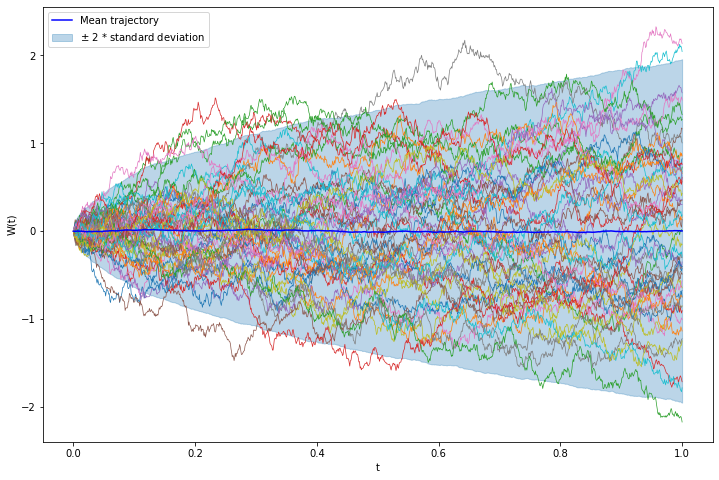

In [154]:
n_processes = 1000
t, trajectories = ex.simulate_wiener_process(n_processes=n_processes)
ex.plot_trajectories(t, trajectories)

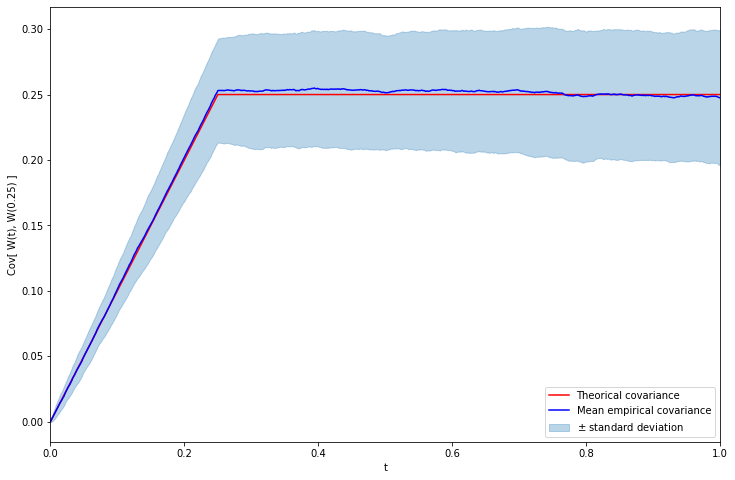

In [155]:
ex.plot_estimated_covariance(n_processes=100)

<div class="myblock exercise">
<h1>Exercise 7</h1> <a href='#Ejercicio-7' class='anchor-link'>¶</a>
    
Consider two independent Wiener processes $W(t), W'(t)$. Show that the following processes have the same covariances as the standard Wiener process:
    
<b> a) </b> $V_1(t) = pW(t) + \sqrt{1-p^2}W'(t), \; \; t \geq 0$\\
    
<b> b) </b> $V_2(t) = -W(t), \; \; t \geq 0$\\
    
<b> c) </b> $V_3(t) = \sqrt{c} W(t/c), \; \; t \geq 0, c > 0$\\
    
<b> d) </b> $V_4(0) = 0; V_4(t) = t W(1/t) \; \; t \geq 0$
    
Make a plot of the trajectories of the first three processes to illustrate that they are standard Brownian motion processes. Compare the histogram of the final values of the simulated trajectories with the theoretical density function.
</div>


**Solution.-**

We already know that, given a standard Wiener process $W(t)$, its covariance between times $t,s$ is given by

$$
Cov[W(t), W(t')] = min(t,t')
$$

Also, recall that, since $E[W(t)] = 0$ for any Wiener process, we can express the covariance as:

$$
Cov[W(t),W(t')] = E[(W(t) - E[W(t)])(W(t') - E[W(t')])] = E[W(t)W(t')]
$$

We will prove case by case, using in all the cases the linearity of the expectation of a random variable.

1. \begin{align*}\mathbb E [V_1(t) V_1(s)] & =  \mathbb E\left[ \left(pW(t) + \sqrt{1-p^2}W'(t)\right)\left(pW(s) + \sqrt{1-p^2}W'(s)\right)\right] \\
& = 
p^2 \mathbb  E[W(t)W(s)] + p \sqrt{1-p^2}E[W(t)W'(s)]\\
& + p \sqrt{1-p^2}\mathbb E[W'(t)W(s)] + (1-p^2)\mathbb E[W'(t)W'(s)]\\
& \stackrel{(1)}{=} p^2 t + (1-p)^2 t\\
& = t
\end{align*}

Where, in $(1)$ we have used that the Wiener processes are independent and we have considered that the minimum between $t$ and $s$ is $t$. In the other case (that is, $s \leq t$), we would only have to swap the roles of $t$ and $s$. In fact, we will **assume this in all the following cases**.



2. \begin{align*}\mathbb E [V_3(t) V_3(s)] & =  \mathbb E\left[ (-W(t)) (- W(s))\right] \\
& =  \mathbb E\left[W(t)W(s)\right]\\
& = t
\end{align*}

3. \begin{align*}
\mathbb E [V_2(t) V_2(s)] \\
& =  \mathbb E\left[ W(t/c) W(s/c)\right] \\
& = c \frac{t}{c}\\
& = t
\end{align*}

4. In this case, when $t = 0$, we have:
$$
\mathbb E [V_4(t)V_4(s)] = 0 = t.
$$
Now, let $t > 0$ (and $t < s$, as we are assuming from the beginning). Then:
\begin{align*}\mathbb E [V_4(t) V_4(s)] & =   \mathbb E\left[tW(1/t) \; sW(1/s)\right] \\
& = ts  \mathbb E\left[W(1/t) \; W(1/s)\right] \\
& = ts \; \min \left(1/t, 1/s\right) \\
& = ts \frac{1}{s} \\
& = t
\end{align*}


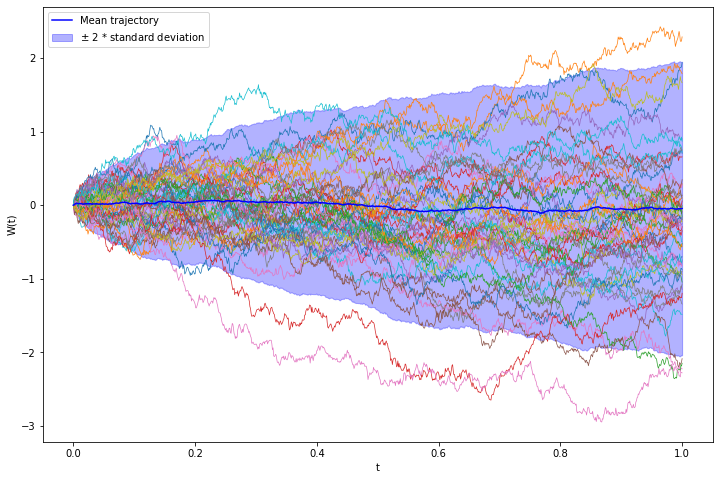

In [99]:
# Creo que este es el apartado a, lo estaba usando para comparar con Antonio
# Como dijimos, quizas rho=0.5 mejor?

rho = 0.5
t, W1 = ex.simulate_wiener_process()
_, W2 = ex.simulate_wiener_process()
V1 = rho*W1 + np.sqrt(1 - rho**2)*W2
ex.plot_trajectories(t, V1)

In [50]:
rho = 0.5
c = np.e

ts, W1 = ex.simulate_wiener_process(n_processes = 10000)
_, W2 = ex.simulate_wiener_process(n_processes = 10000)


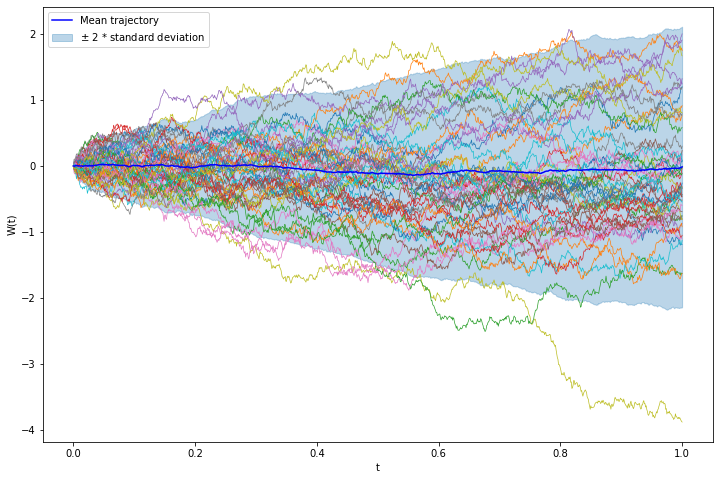

In [114]:
ex.plot_trajectories(ts,W1,max_trajectories = 50)

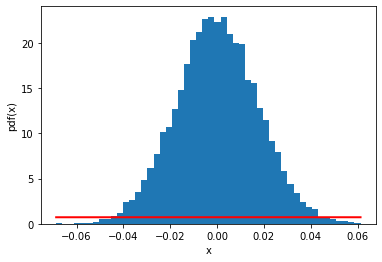

In [13]:
t = 0.3
X = W1[:, np.where(ts == t)[0][0]]
pdf = lambda x : stats.norm.pdf(x, 0, np.sqrt(t))
plots.plot_pdf(X =X,pdf = pdf)

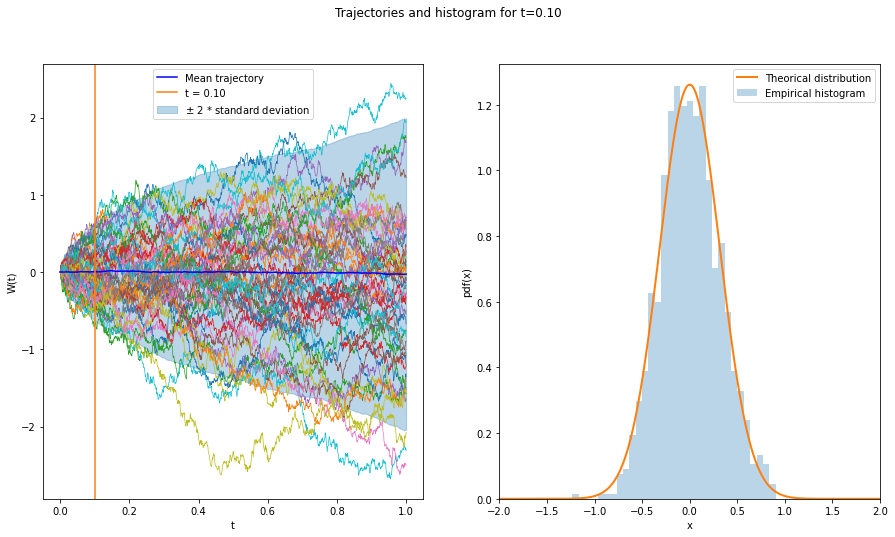

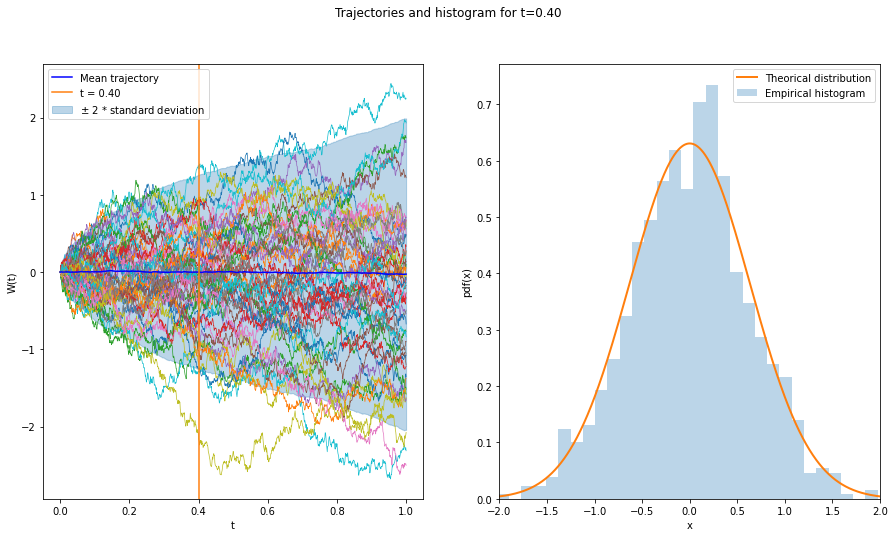

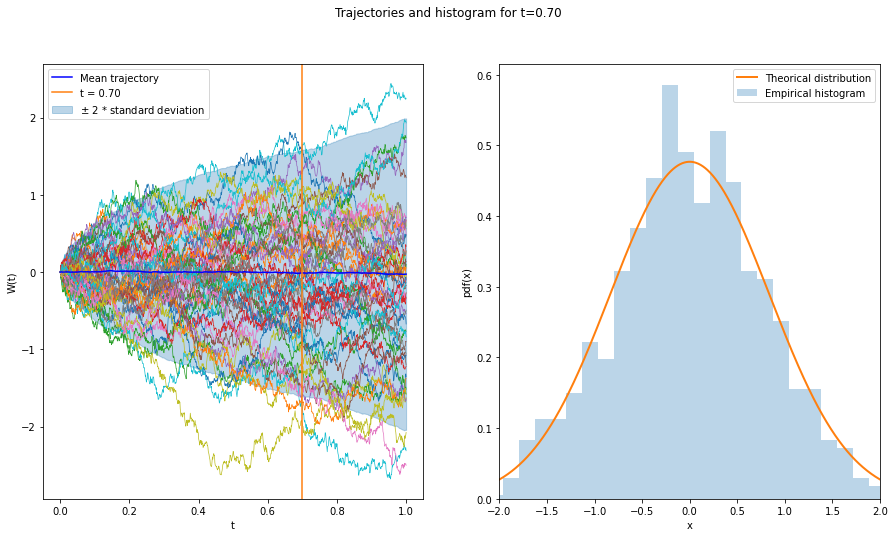

In [153]:
ts, trajectories = ex.simulate_wiener_process(n_processes=1000)

ex.plot_trajectories_and_hist(ts, trajectories, 100, hist_xlims=[-2,2])
ex.plot_trajectories_and_hist(ts, trajectories, 400, hist_xlims=[-2,2])
ex.plot_trajectories_and_hist(ts, trajectories, 700, hist_xlims=[-2,2])